### Nama: Azka Kasmito Putra
### NIM: 2241720216
### Kelas: TI - 3E

# PRAKTIKUM 1
Klasifikasi SVM dengan Data Dummy

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Penjelasan kode**

numpy: Operasi pada array atau matriks.
matplotlib.pyplot: Membuat visualisasi data (grafik dan diagram).
scipy.stats: Analisis statistik.
seaborn: Visualisasi data yang lebih canggih, biasanya berbasis statistik.

Pada kegiatan ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

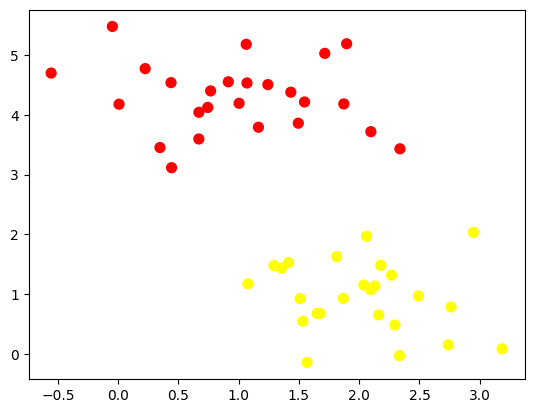

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Penjelasan kode**

1. from sklearn.datasets import make_blobs

Mengimpor fungsi make_blobs dari modul sklearn.datasets (bagian dari Scikit-learn).
2. X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

Membuat dataset sintetis berupa gumpalan (blobs) dengan 50 sampel, 2 kluster (centers), dan standar deviasi 0.60 untuk penyebaran kluster.
3. plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Membuat scatter plot dari data yang dihasilkan oleh make_blobs.

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

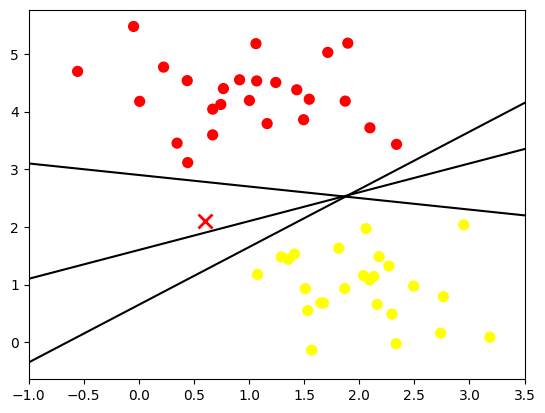

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

**Penjelasan kode**
1. xfit = np.linspace(-1, 3.5)

Membuat array xfit yang berisi nilai-nilai yang terdistribusi secara linier antara -1 hingga 3.5.
2. plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Membuat scatter plot dari data yang ada di X (koordinat x dan y)
3. plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

Menambahkan tanda silang berwarna merah (x) di titik koordinat (0.6, 2.1).

4. for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:

Looping untuk menggambar beberapa garis dengan kemiringan (m) dan intercept (b) yang berbeda.
5. plt.plot(xfit, m * xfit + b, '-k')

Menggambar garis lurus dengan warna hitam ('-k') menggunakan persamaan y = mx + b. Nilai x diambil dari xfit, dan nilai y dihitung berdasarkan nilai m dan b dalam loop.
6. plt.xlim(-1, 3.5)

Mengatur batas sumbu x dari -1 hingga 3.5.

Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

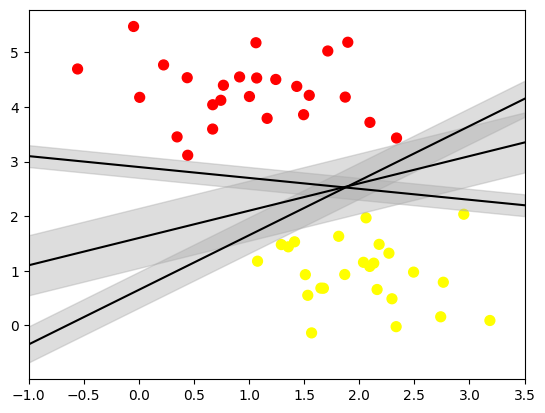

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Penjelasan kode**
1. xfit = np.linspace(-1, 3.5) -> Membuat array xfit yang berisi nilai-nilai linier dari -1 hingga 3.5.
2. plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') -> Membuat scatter plot dari data yang terdapat pada array X (koordinat x dan y) dengan warna yang ditentukan oleh label y (kluster) menggunakan colormap 'autumn'.
3. for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: -> Looping untuk menggambar beberapa garis lurus dengan kemiringan m, intercept b, dan margin d (deviasi) yang berbeda.
4. yfit = m * xfit + b -> Menghitung nilai y untuk setiap nilai xfit menggunakan persamaan garis lurus y = m * x + b.
5. plt.plot(xfit, yfit, '-k') -> Menggambar garis lurus dengan warna hitam (-k) menggunakan nilai xfit sebagai sumbu x dan yfit sebagai sumbu y.
6. plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4) -> Mengisi area di antara dua batas, yaitu yfit - d dan yfit + d (d adalah margin deviasi), untuk setiap nilai xfit. Area ini diisi dengan warna abu-abu (#AAAAAA) dan tingkat transparansi alpha=0.4.
7. plt.xlim(-1, 3.5) -> Mengatur batas sumbu x dari -1 hingga 3.5.

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

**Penerappan fitting SVM**

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

**Penjelasan kode**

Kode ini menggunakan Support Vector Machine (SVM) dengan kernel linier untuk membangun model klasifikasi. Model dilatih pada data 2D (X dan y) untuk menemukan hyperplane linier yang memisahkan dua kluster data dengan optimal. Parameter C yang besar berarti model sangat berfokus pada pemisahan yang sempurna antara dua kelas.

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.**
**On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Penjelasan kode**

Kode ini menggunakan Support Vector Machine (SVM) dengan kernel linier untuk membangun model klasifikasi. Model dilatih pada data 2D (X dan y) untuk menemukan hyperplane linier yang memisahkan dua kluster data dengan optimal. Parameter C yang besar berarti model sangat berfokus pada pemisahan yang sempurna antara dua kelas.Fungsi plot_svc_decision_function bertujuan untuk memvisualisasikan fungsi keputusan (decision function) dari model SVM, termasuk hyperplane yang memisahkan dua kelas dan margin di kedua sisi hyperplane. Jika diaktifkan, support vectors juga akan ditampilkan pada plot, memberikan gambaran yang lengkap tentang bagaimana SVM memisahkan dua kelas data.

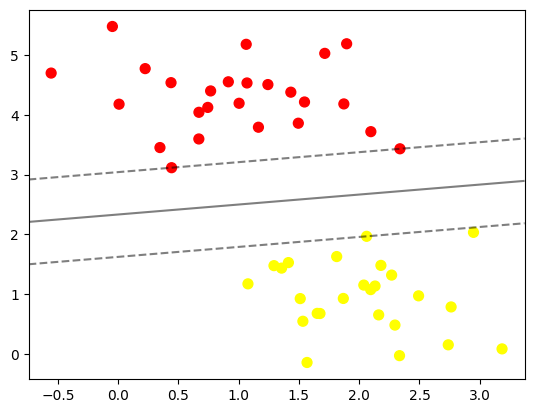

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

**Penjelasn kode**

Kode ini digunakan untuk menampilkan scatter plot data beserta hasil pemodelan SVM, yaitu hyperplane pemisah antara dua kelas data, margin (jarak dari hyperplane ke support vectors), dan support vectors itu sendiri. Visualisasi ini membantu dalam memahami bagaimana SVM menemukan batas pemisah yang optimal untuk memisahkan dua kluster dalam ruang fitur dua dimensi.

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

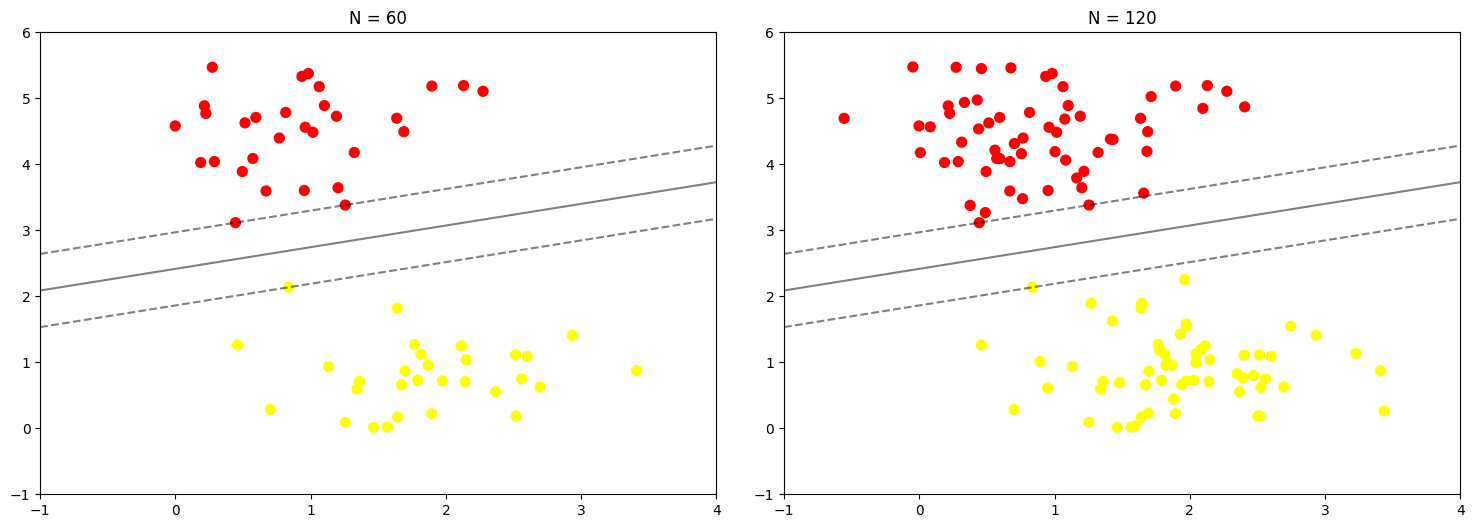

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Penjelasan kode**

Kode ini bertujuan untuk membandingkan bagaimana model SVM bekerja dengan jumlah data yang berbeda (60 dan 120 sampel). Setiap subplot menggambarkan data scatter, hyperplane pemisah, margin, dan support vectors untuk dua ukuran dataset yang berbeda, sehingga memungkinkan kita untuk melihat bagaimana perubahan jumlah data memengaruhi hasil model SVM.

**Data Tidak Terpisah Secara Linier**

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan nonlinier dengan sebuah classifier linier.

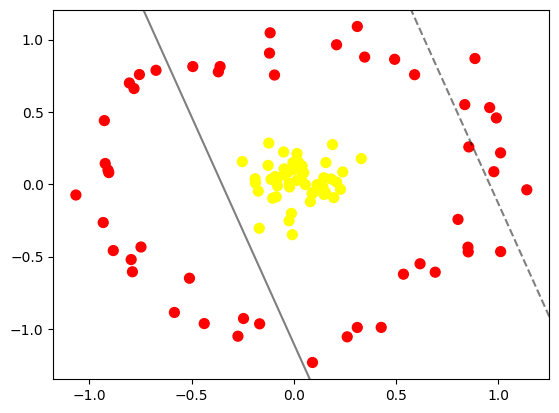

In [10]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

**Penjelasan kode**

Kode ini digunakan untuk menunjukkan bahwa model SVM dengan kernel linier tidak efektif untuk dataset yang berbentuk lingkaran atau tidak dapat dipisahkan secara linier. Ini mengilustrasikan keterbatasan model linier pada data yang memerlukan pemisahan non-linier.

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

In [11]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.83595129,  0.55081525],
       [ 0.88587152,  0.86952953],
       [ 0.22795683, -0.03465694],
       [ 0.26094376, -1.05508124],
       [ 0.34631363,  0.87946618],
       [ 0.49292852,  0.86397818],
       [-0.10342419, -0.09641125],
       [-0.25222908,  0.1563768 ],
       [ 0.20901523,  0.0152465 ],
       [-0.27356798, -1.05082388],
       [-0.24620523, -0.92835322],
       [-0.11907178,  0.90665869],
       [-0.51057476, -0.64981323],
       [ 0.02086496,  0.15663451],
       [-0.36083844,  0.81424331],
       [-0.02249745,  0.00792782],
       [-0.90910991,  0.0980094 ],
       [ 0.8515185 , -0.43521362],
       [-0.11164693,  0.03390934],
       [-0.92685641,  0.44015362],
       [-0.67418912,  0.78792322],
       [-0.0802029 , -0.01040984],
       [-0.49419163,  0.81393648],
       [-0.01204911, -0.201414  ],
       [ 0.035995  ,  0.04131016],
       [-0.43826838, -0.963282  ],
       [ 0.08933181, -0.06429591],
       [ 0.01549222,  0.02758446],
       [-0.79573499, -0.52084834],
       [ 0.31033235,  1.09103227],
       [ 0.11370797, -0.00296226],
       [ 1.01116317,  0.21706545],
       [ 0.01541261,  0.21249574],
       [-0.93231795, -0.26473547],
       [-0.00506035,  0.10062927],
       [ 0.09124645, -1.23245611],
       [ 1.13936178, -0.03838754],
       [ 0.1949422 , -0.09251835],
       [-0.09464606,  0.75530578],
       [-0.04791793,  0.10607751],
       [ 0.14651592,  0.04466743],
       [-0.12266188,  0.28481468],
       [-0.0209088 , -0.01847237],
       [-0.88314142, -0.45850681],
       [ 0.23895137,  0.08517656],
       [-0.08459755,  0.02634895],
       [ 0.31027568, -0.99039029],
       [-0.17405785, -0.04746651],
       [-0.02936597,  0.08371839],
       [-0.75542934,  0.75871586],
       [-0.18934342,  0.03786604],
       [-0.90519368,  0.08065818],
       [-0.74763052, -0.43396483],
       [-0.16916118, -0.30449617],
       [ 0.42732494, -0.98983234],
       [-0.1257991 ,  0.13043058],
       [ 0.61731214, -0.5499085 ],
       [-0.36934411,  0.77738848],
       [ 0.1422651 , -0.01945509],
       [ 0.53603497, -0.62203178],
       [-0.11599249,  1.04712577],
       [ 0.15427324, -0.05694944],
       [ 1.01140769, -0.46565514],
       [ 0.09308219, -0.05859712],
       [ 0.03588058,  0.09645673],
       [ 0.14777531, -0.070914  ],
       [ 0.12305247, -0.0061816 ],
       [-0.09175347,  0.05300933],
       [-0.9226594 ,  0.14350722],
       [-0.05019359,  0.22348451],
       [ 0.9782178 ,  0.08689539],
       [ 0.18890698,  0.27450633],
       [ 0.11451832, -0.03823914],
       [-0.7819088 ,  0.66197529],
       [ 0.05628147, -0.00258539],
       [ 0.08066058, -0.12046721],
       [ 0.95761182,  0.53013227],
       [ 0.85284248, -0.46773568],
       [-0.1674515 , -0.96519898],
       [ 0.15657423,  0.14984241],
       [-0.78953709, -0.60509173],
       [ 0.04036494,  0.12691171],
       [ 0.20878271,  0.96457248],
       [-0.80447875,  0.70016403],
       [ 0.6914197 , -0.60806895],
       [-0.18780799,  0.00885861],
       [-0.02345436, -0.25277581],
       [-0.58421979, -0.88656444],
       [ 0.04834777,  0.08066319],
       [ 0.32995729,  0.17751226],
       [ 0.99038898,  0.45847802],
       [-0.00445033,  0.14947318],
       [ 0.85583814,  0.2580004 ],
       [ 0.18286368,  0.03649063],
       [-0.00749383, -0.34882637],
       [-0.04902617,  0.06429626],
       [-0.08632011, -0.08714325],
       [ 0.80281396, -0.2431914 ],
       [-1.0660656 , -0.0742805 ],
       [ 0.59049707,  0.75777863]]), y=array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0]))>

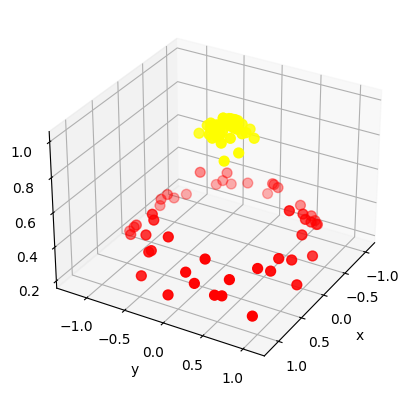

In [13]:
!pip install ipywidgets
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed # import the interact function

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180), # you also had a typo here, it should be azim not azip
         X=fixed(X), y=fixed(y))

In [ ]:
interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

In [ ]:
<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.11710337e-01, -4.96366283e-01],
       [ 7.27539244e-01, -7.04340110e-01],
       [ 1.15377033e+00,  4.22281369e-02],
       [-1.93508568e-02, -2.45661004e-03],
       [-2.84303065e-02, -8.12580465e-02],
       [ 5.47108604e-03, -1.23375502e-01],
       [-4.16440568e-02, -2.99573424e-02],
       [-5.82375560e-01, -9.38192480e-01],
       [-8.27126076e-01,  5.42230072e-01],
       [ 7.85210547e-01,  4.54940992e-01],
       [-3.88559391e-01,  3.84652903e-02],
       [-3.42088050e-01,  8.55511799e-01],
       [-4.81425570e-02, -1.59928417e-01],
       [ 1.87022047e-03,  1.89494319e-01],
       [-9.69086983e-03,  1.17829251e-01],
       [-7.84345928e-01, -4.66479993e-01],
       [ 6.85107055e-02,  1.77194939e-01],
       [ 1.72857740e-01,  4.38177465e-02],
       [-8.12998991e-01, -7.19923857e-01],
       [-2.01575223e-01, -2.39583752e-02],
       [-9.75925418e-01,  2.60953744e-01],
       [-4.13054659e-02,  2.00812665e-01],
       [ 7.13340431e-01, -8.16168303e-01],
       [ 3.64574410e-02, -1.07939842e+00],
       [-1.54397411e-01,  4.40008002e-02],
       [-4.93135049e-01,  8.08010876e-01],
       [ 1.45393445e-01, -1.46592893e-02],
       [-8.21113259e-01,  6.26589314e-01],
       [-8.27379977e-01, -2.75044907e-01],
       [ 9.48902221e-02, -6.27649995e-02],
       [-2.21554724e-02,  1.01028554e-01],
       [-1.09030379e+00,  6.74538986e-02],
       [ 1.55846639e-01,  1.61971599e-01],
       [-9.13666743e-02, -7.04703795e-02],
       [-8.13169827e-01, -5.03526231e-01],
       [ 4.07881892e-01, -7.07374192e-01],
       [-2.69630418e-01, -1.19784632e+00],
       [-8.71995956e-01, -2.28090950e-01],
       [ 3.93399315e-02,  9.72349031e-01],
       [ 8.35245788e-02,  9.58777109e-03],
       [ 1.01780488e+00, -3.43266966e-02],
       [-3.03151481e-01,  5.05179111e-02],
       [ 7.29975189e-02, -2.79509483e-01],
       [ 1.18741375e-02, -1.83848700e-02],
       [ 1.21826951e-02, -4.98787854e-02],
       [-5.11708040e-01, -8.51074760e-01],
       [ 2.41015661e-01, -4.71012997e-03],
       [ 6.90842546e-01,  8.45957622e-01],
       [-1.11030618e-02, -2.35284175e-01],
       [ 8.39749655e-01,  5.63132132e-01],
       [ 8.61108999e-02,  9.49359269e-01],
       [-7.34090929e-02, -2.07504095e-01],
       [ 6.60956273e-02,  3.87593881e-01],
       [ 3.19380104e-01, -1.03269710e+00],
       [ 5.29011856e-03,  5.08287163e-02],
       [-1.52505024e-02,  9.80360676e-02],
       [ 3.30861296e-01,  1.01634300e+00],
       [ 7.08355114e-02,  2.95618673e-01],
       [ 4.51967451e-01,  8.62692136e-01],
       [-7.30276209e-02, -9.40698117e-01],
       [-1.88912212e-01, -2.39175141e-02],
       [ 1.44720944e-01,  1.18452174e+00],
       [ 5.32671697e-02, -1.09540084e-01],
       [ 2.48016942e-02, -3.08731322e-01],
       [-5.61754363e-02, -1.10575612e-02],
       [-1.81478209e-02,  1.88981091e-01],
       [-3.90760142e-01,  9.17806040e-01],
       [-5.97653736e-02, -1.22911470e+00],
       [-1.16245908e+00,  3.07466341e-01],
       [-2.53459621e-01,  9.62177787e-01],
       [-2.67966216e-02, -5.15756373e-02],
       [-1.88229489e-04, -1.99898237e-01],
       [ 1.16661531e-01, -1.57798693e-01],
       [-1.21836026e-01, -1.68045549e-01],
       [ 1.02023011e-01,  9.51238087e-03],
       [ 2.76691140e-02,  2.35529803e-01],
       [-6.96873537e-01,  7.33320715e-01],
       [ 1.00916206e+00, -4.53327793e-01],
       [ 1.01853684e+00, -3.31902619e-01],
       [ 5.66691765e-01,  8.72696245e-01],
       [ 8.47878444e-01,  3.29580343e-01],
       [ 9.12248953e-01, -3.59369459e-01],
       [ 2.23464288e-01, -9.28408565e-01],
       [-1.34216871e-01,  2.34427080e-02],
       [-1.25646754e-01, -2.43748701e-01],
       [ 9.88629144e-01, -7.15813419e-02],
       [ 3.14491126e-01, -8.06705684e-01],
       [ 6.02048609e-01,  9.44127099e-01],
       [-9.81202450e-01,  1.21225826e-01],
       [ 2.70639526e-02,  5.70377390e-02],
       [-8.06006784e-02, -1.82845293e-01],
       [ 4.60760700e-02, -1.17021890e-01],
       [-2.81166812e-01,  2.53371733e-01],
       [-8.57977773e-01, -9.05159358e-01],
       [ 1.84687093e-01,  9.10867575e-03],
       [ 8.16628676e-01,  4.68389299e-02],
       [ 4.76247020e-02, -3.81171893e-02],
       [ 7.20594596e-01, -5.19359481e-01],
       [-8.64587235e-01,  7.40524241e-01],
       [-9.46013036e-02,  8.56559489e-02]]), y=array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]))>

walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [16]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

**Penjelasan kode**

Kode ini digunakan untuk melatih model SVM dengan kernel RBF pada dataset berbentuk lingkaran, memungkinkan pemisahan yang lebih kompleks dan non-linier dibandingkan dengan model linier

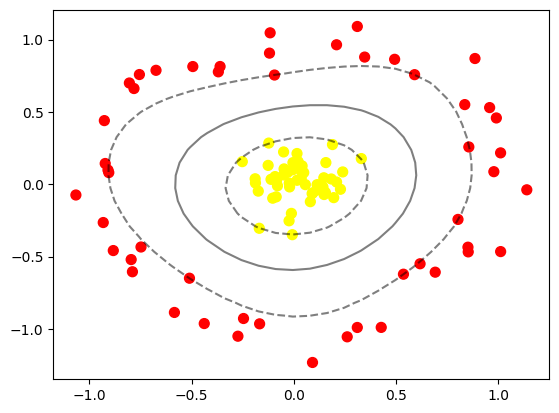

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Penjelasan kode**

Kode ini bertujuan untuk memvisualisasikan data bersama dengan hasil pemodelan SVM dengan kernel RBF. Ini termasuk:

* Menampilkan data dan kelasnya.
* Menggambarkan hyperplane dan margin yang dihasilkan oleh model SVM.
* Menyoroti support vectors yang memainkan peran kunci dalam penentuan

**Data Overlap**

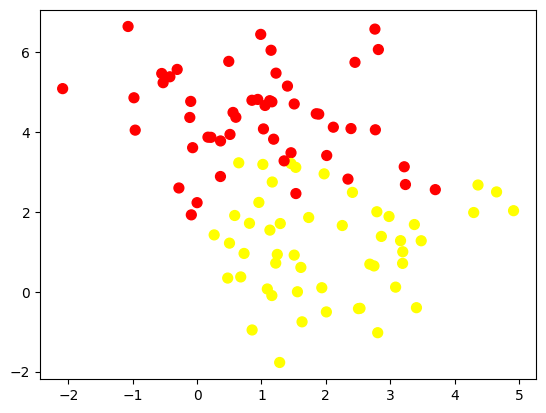

In [18]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Penjelasan kode**
1. X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) -> Membuat dataset buatan dengan 100 sampel data, yang terbagi menjadi 2 kluster.
2. plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') -> Membuat scatter plot dari data X dengan warna berdasarkan label y.

untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

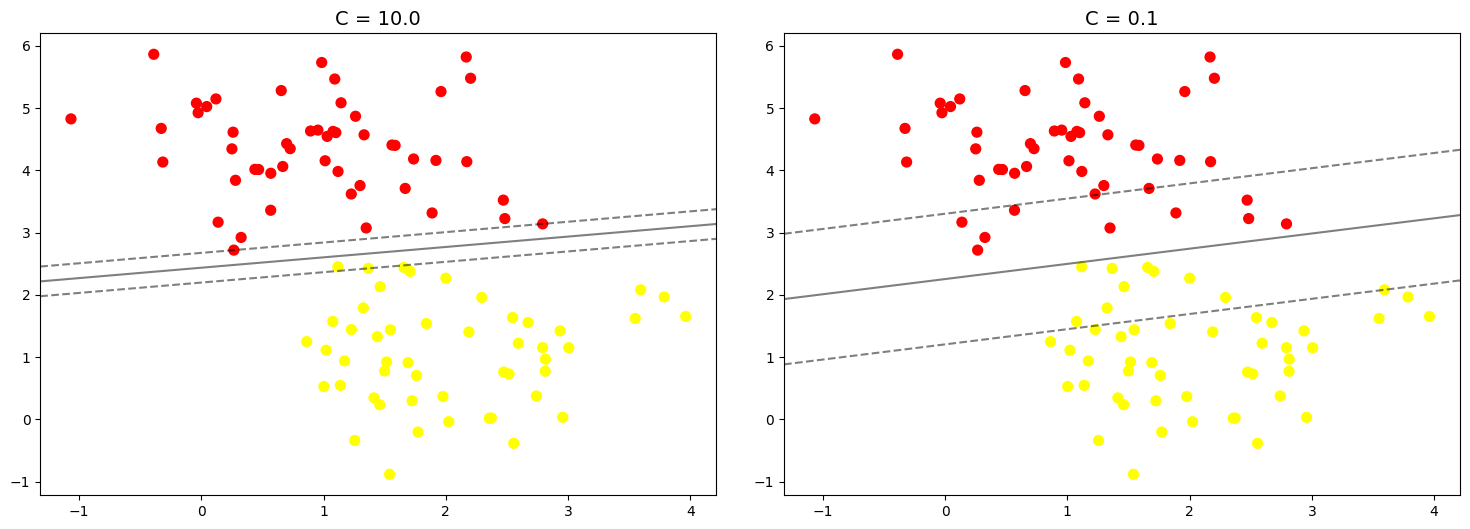

In [19]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

**Penjelasan kode**

Kode ini untuk membandingkan bagaimana parameter regulasi C yang berbeda memengaruhi model SVM pada dataset dengan dua kluster. Dengan nilai C yang berbeda (10.0 dan 0.1), kode ini menunjukkan perubahan dalam pemisahan data, margin, dan support vectors pada subplot yang berbeda.

Perlu diperhatikan bahwa nila optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa)

# PRAKTIKUM 2
Klasifikasi SVM Pada Data Citra

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

In [20]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Penjelasan kode**

1. from sklearn.datasets import fetch_lfw_people -> Mengimpor fungsi fetch_lfw_people dari sklearn.datasets untuk memuat dataset wajah.
2. faces = fetch_lfw_people(min_faces_per_person=60) -> Memuat dataset wajah dengan minimal 60 gambar per orang.
3. print(faces.target_names) -> Mencetak nama-nama target (nama orang) yang ada dalam dataset.
4. print(len(faces.target_names)) -> Mencetak jumlah unik nama orang dalam dataset.
5. print(faces.images.shape) -> Mencetak dimensi dari array gambar dalam dataset.

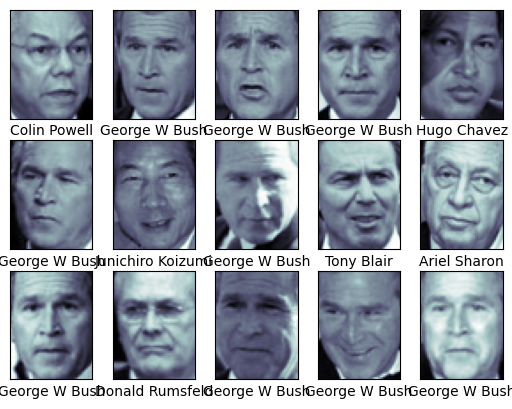

In [21]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Penjelasan kode**

Kode ini untuk menampilkan 15 contoh gambar wajah dari dataset LFW dalam format grid, dengan setiap gambar diberi label nama orang yang sesuai. Ini memberikan visualisasi yang jelas dari berbagai wajah yang ada dalam dataset.

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

**Penjelasan kode**

Kode ini menyiapkan pipeline untuk klasifikasi wajah atau data lain dengan menggabungkan reduksi dimensi menggunakan PCA dan klasifikasi menggunakan SVM dengan kernel RBF. Pipeline ini memungkinkan pemrosesan data yang efisien dan terintegrasi.

In [23]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

**Penjelasan kode**

Mengatur data menjadi subset pelatihan dan pengujian untuk melatih model pada satu subset dan mengujinya pada subset yang berbeda, membantu evaluasi kinerja model.


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 40s, sys: 27.5 s, total: 2min 8s
Wall time: 1min 21s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


**Penjelasan kode**

Kode untuk melakukan pencarian grid untuk menemukan kombinasi hyperparameter C dan gamma terbaik untuk model SVM dalam pipeline. Setelah pencarian, kode ini mencetak parameter terbaik dan skor terbaik yang dicapai.

prediksi label untuk data testing

In [25]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

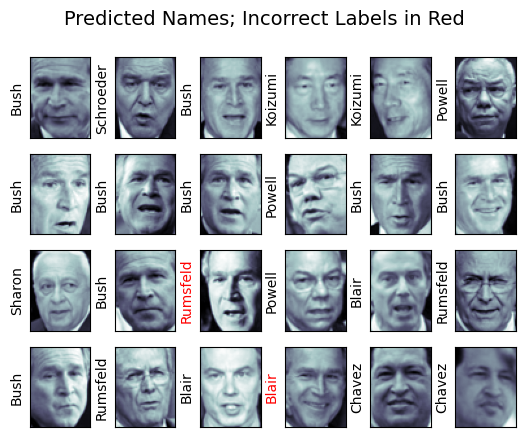

In [26]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

**Penjelasan kode**

Kode ini untuk memvisualisasikan hasil prediksi model SVM pada data pengujian dalam format grid gambar. Label pada gambar menunjukkan nama yang diprediksi, dengan label yang salah diberi warna merah, memberikan gambaran jelas tentang kinerja model pada data pengujian.

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



**Penjelasan kode**

Kode ini untuk mengevaluasi kinerja model klasifikasi dengan menghasilkan laporan klasifikasi yang mendetail.

Text(113.92222222222219, 0.5, 'predicted label')

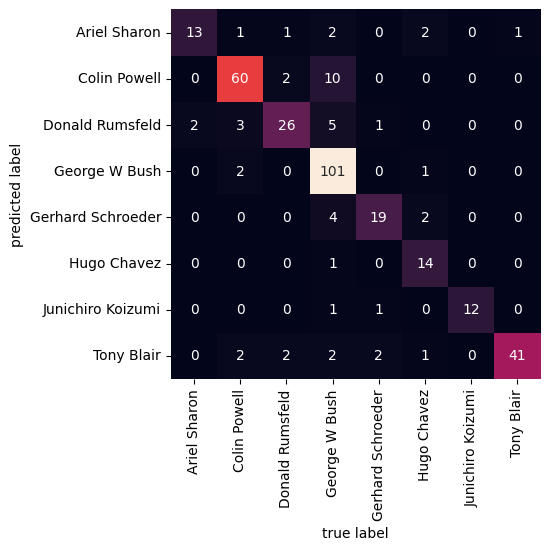

In [27]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Penjelasan kode**

Kode ini untuk menghasilkan dan menampilkan matriks kebingungan dalam bentuk heatmap, yang memvisualisasikan kinerja model klasifikasi dengan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

# PRAKTIKUM 3
Klasifikasi Naive Bayes dengan Data Dummy

Kode ini bertujuan untuk menghasilkan dan menampilkan matriks kebingungan dalam bentuk heatmap, yang memvisualisasikan kinerja model klasifikasi dengan menunjukkan jumlah prediksi benar dan salah untuk sePada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.tiap kelas.

**Mendefinisikan Data Dummy**

In [29]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 65 125]
 [117  92]
 [269  81]
 [174  52]
 [ 23 150]
 [214   0]
 [ 84 299]
 [ 36 107]
 [233  62]
 [167 175]
 [182  17]
 [ 99 128]
 [231  13]
 [173  28]
 [105  47]
 [109  72]
 [ 66  74]
 [ 32  94]
 [126  81]
 [180 188]
 [ 41 174]
 [  4  69]
 [ 56 120]
 [118  44]
 [ 99  70]
 [113 149]
 [ 65 277]
 [129  68]
 [ 97 106]
 [ 71 297]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


**Penjelasan kode**

Proses ini membuat dataset klasifikasi sintetik dengan dua fitur dan dua kelas, lalu memproses data fitur untuk mengubahnya dari float ke integer dengan membulatkan nilai dan mengalikan dengan 100. Ini menghasilkan data yang diskrit, bukan kontinu.

Parameter yang digunakan pada fungsi make_classification adalah,

* n_samples: jumlah sampel yang diinginkan

* n_features: jumlah fitur yang digunakan

* n_classes: jumlah kelas

* n_informative: jumlah fitur yang memiliki korelasi dengan kelas

* n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas

* n_repeated: jumlah fitur yang diulang

**(Opsional) Membuat Data Frame**

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [30]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,65,125,0
1,117,92,0
2,269,81,0
3,174,52,0
4,23,150,0


**Penjelasan kode**

Proses ini mengubah data fitur dan label menjadi format tabular yang lebih mudah dianalisis dengan menggabungkannya dalam DataFrame pandas, dan menampilkan sebagian data untuk pemeriksaan awal.

Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [31]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,65,125,Kelas B
1,117,92,Kelas B
2,269,81,Kelas B
3,174,52,Kelas B
4,23,150,Kelas B


**Penjelasan kode**

Proses ini bertujuan untuk mengganti label numerik dalam DataFrame dengan label yang lebih deskriptif, membuat data lebih mudah dibaca dan dipahami.

**(Opsional) Visualisasi Data**

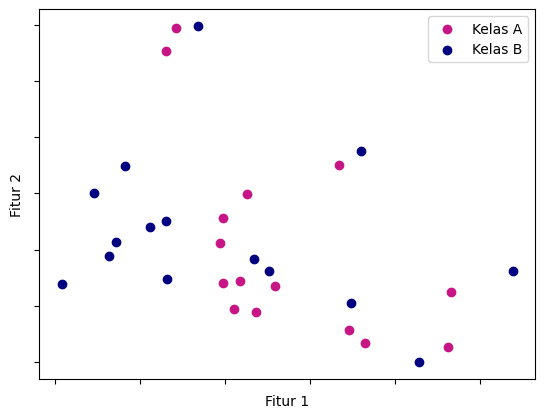

In [32]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

**Penjelasan kode**

Kode ini memvisualisasikan data dari dua kelas (Kelas A dan Kelas B) dalam bentuk scatter plot dengan warna yang berbeda, memudahkan untuk melihat distribusi antara dua kelas berdasarkan Fitur 1 dan Fitur 2

**Klasifikasi Multinomial Naive Bayes**

In [33]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.6666666666666666


**Penjelasan kode**

Proses ini melatih dan mengevaluasi model klasifikasi Naive Bayes dengan menggunakan data dummy, serta membandingkan akurasi pada data training dan testing.

**Klasifikasi Gaussian Naive Bayes**

In [34]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6666666666666666
Hasil akurasi data test (Gaussian): 0.3333333333333333


**Penjelasan kode**

Kode ini melatih dan mengevaluasi model Gaussian Naive Bayes menggunakan dataset yang sama dengan sebelumnya (dari MultinomialNB) dan membandingkan akurasi model untuk data training dan testing

# Praktikum 4 (Opsional)
Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

## Load Data

Pada tahap ini kita akan loading data ke dalam data frame dan melakukan inspeksi sederhana untuk memastikan apakah kita perlu proses pra pengolahan data sebelum melakukan ekstraksi fitur dan permodelan

In [36]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Penjelasan kode**

Kode tersebut bertujuan untuk memuat dan menampilkan bagian awal dari dataset spam.csv yang berisi data email yang digunakan untuk klasifikasi spam.

Terdapat 3 kolom yang tidak bermanfaat untuk proses selanjutnya, maka kita perlu membuang kolom tersebut. Selain itu, untuk memudahkan pembacaan data, kita juga akan mengubah nama kolom v1 yang berupa label dan v2 yang berupa teks sms

## Pra Pengolahan Data

Beberapa hal yang akan dilakukan pada tahap ini yaitu,
1. Drop kolom yang tidak digunakan
2. Ubah nama kolom v1 (label) dan v2 (teks sms)
3. Inspeksi Data
4. Encode label
5. Memisahkan fitur dengan label

## Drop Kolom

In [37]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Penjelasan kode**

Kode ini digunakan untuk menghapus kolom tertentu dalam DataFrame dan menampilkan data setelah perubahan.

## Ubah Nama Kolom V1 dan V2

In [38]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Penjelasan kode**

Kode ini digunakan untuk mengganti nama kolom dalam DataFrame dan menampilkan hasilnya setelah penggantian nama.

## Inspeksi Data

In [39]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**Penjelasan kode**

Kode ini digunakan untuk memeriksa distribusi data, kelengkapan data, dan statistik deskriptif dari DataFrame df.

## Encode Label

In [40]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Penjelasan kode**

Kode ini digunakan untuk mengonversi label kategori menjadi bentuk numerik (proses encoding) dan menampilkan hasilnya

**Memisahkan Fitur dengan Label**

In [41]:
X = df['SMS'].values
y = df['Labels'].values

## Ekstraksi fitur

Ekstraksi fitur untuk setiap SMS akan menggunakan konsep Bag of Words. Kita dapat menggunakan fungsi CountVectorizer dari scikit-learn. Akan tetapi untuk mencegah leaking information kita akan melakukan split data terlebih dahulu, baru melakukan transformasi terhadap data training dan testing.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

**Penjelasan kode**

Kode ini berfungsi untuk melakukan pra-pemrosesan data teks menggunakan CountVectorizer dan mempersiapkan data untuk pelatihan dan pengujian model.

In [48]:
print(len(bow.get_feature_names_out())) # Use get_feature_names_out() instead of get_feature_names()
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [ ]:
['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '07808',
 '07808247860',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08701213186',
 '08701417012',
 '08701417012150p',
 '0870141701216',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704050406',
 '08704439680',
 '08704439680ts',
 '08706091795',
 '0870737910216yrs',
 '08707500020',
 '08707509020',
 '08707808226',
 '08708034412',
 '08708800282',
 '08709222922',
 '0871',
 '087104711148',
 '08712101358',
 '08712103738',
 '0871212025016',
 '08712300220',
 '087123002209am',
 '08712317606',
 '08712400200',
 '08712400602450p',
 '08712402050',
 '08712402578',
 '08712402779',
 '08712402902',
 '08712404000',
 '08712405020',
 '08712405022',
 '08712460324',
 '08712466669',
 '0871277810810',
 '0871277810910p',
 '08714342399',
 '08714712379',
 '08714712388',
 '08714712394',
 '08714712412',
 '08714714011',
 '08715203028',
 '08715203649',
 '08715203652',
 '08715203656',
 '08715203677',
 '08715203685',
 '08715203694',
 '08715205273',
 '08715500022',
 '08715705022',
 '08717111821',
 '08717168528',
 '08717205546',
 '0871750',
 '08717509990',
 '08717898035',
 '08718711108',
 '08718720201',
 '08718723815',
 '08718725756',
 '08718726270',
 '087187262701',
 '08718726970',
 '08718726971',
 '08718726978',
 '087187272008',
 '08718727868',
 '08718727870',
 '08718727870150ppm',
 '08718730666',
 '08718738001',
 '08718738002',
 '08718738034',
 '08719180248',
 '08719181259',
 '08719181503',
 '08719181513',
 '08719839835',
 '08719899217',
 '08719899229',
 '09',
 '09050000301',
 '09050000332',
 '09050000460',
 '09050000555',
 '09050000878',
 '09050000928',
 '09050001808',
 '09050002311',
 '09050003091',
 '09050090044',
 '09050280520',
 '09053750005',
 '09056242159',
 '09057039994',
 '09058091854',
 '09058091870',
 '09058094454',
 '09058094455',
 '09058094507',
 '09058094565',
 '09058094583',
 '09058094594',
 '09058094597',
 '09058095107',
 '09058097189',
 '09058097218',
 '09058098002',
 '09058099801',
 '09061104276',
 '09061209465',
 '09061213237',
 '09061221061',
 '09061221066',
 '09061701444',
 '09061701461',
 '09061701851',
 '09061701939',
 '09061702893',
 '09061743386',
 '09061743806',
 '09061743810',
 '09061743811',
 '09061744553',
 '09061790121',
 '09061790125',
 '09063442151',
 '09063458130',
 '0906346330',
 '09064011000',
 '09064012160',
 '09064015307',
 '09064018838',
 '09064019014',
 '09064019788',
 '09065069154',
 '09065171142',
 '09065174042',
 '09065394973',
 '09065989180',
 '09065989182',
 '09066350750',
 '09066358152',
 '09066358361',
 '09066361921',
 '09066362206',
 '09066362231',
 '09066364311',
 '09066364349',
 '09066364589',
 '09066368327',
 '09066368470',
 '09066368753',
 '09066380611',
 '09066382422',
 '09066612661',
 '09066660100',
 '09071512432',
 '09071512433',
 '09071517866',
 '09077818151',
 '09094100151',
 '09094646631',
 '09095350301',
 '09099725823',
 '09099726481',
 '09099726553',
 '09701213186',
 '0quit',
 '10',
 '100',
 '1000',
 '1000call',
 '1000s',
 '100percent',
 '100txt',
 '1013',
 '1030',
 '10am',
 '10k',
 '10p',
 '10ppm',
 '10th',
 '11',
 '1120',
 '113',
 '1131',
 '114',
 '1172',
 '11mths',
 '11pm',
 '12',
 '1205',
 '120p',
 '121',
 '1225',
 '123',
 '125',
 '1250',
 '125gift',
 '128',
 '12hours',
 '12hrs',
 '12mths',
 '13',
 '130',
 '1327',
 '14',
 '1405',
 '140ppm',
 '145',
 '1450',
 '146tf150p',
 '14tcr',
 '14thmarch',
 '15',
 '150',
 '1500',
 '150p',
 '150p16',
 '150pm',
 '150ppermesssubscription',
 '150ppm',
 '150ppmpobox10183bhamb64xe',
 '150ppmsg',
 '150pw',
 '151',
 '153',
 '15541',
 '15pm',
 '16',
 '165',
 '1680',
 '169',
 '177',
 '18',
 '1843',
 '18p',
 '18yrs',
 '1956669',
 '1apple',
 '1b6a5ecef91ff9',
 '1cup',
 '1da',
 '1er',
 '1hr',
 '1im',
 '1lemon',
 '1million',
 '1pm',
 '1st',
 '1stchoice',
 '1thing',
 '1tulsi',
 '1win150ppmx3',
 '1winaweek',
 '1winawk',
 '1x150p',
 '20',
 '200',
 '2000',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '20p',
 '21',
 '21870000',
 '21st',
 '22',
 '220',
 '2309',
 '23f',
 '23g',
 '24',
 '24hrs',
 '24th',
 '25',
 '250',
 '250k',
 '255',
 '25p',
 '26',
 '2667',
 '26th',
 '27',
 '28',
 '2814032',
 '28days',
 '28thfeb',
 '29',
 '2c',
 '2channel',
 '2day',
 '2end',
 '2exit',
 '2ez',
 '2find',
 '2getha',
 '2geva',
 '2go',
 '2gthr',
 '2hrs',
 '2kbsubject',
 '2lands',
 '2marrow',
 '2moro',
 '2morow',
 '2morro',
 '2morrow',
 '2morrowxxxx',
 '2mro',
 '2mrw',
 '2nd',
 '2nhite',
 '2nights',
 '2nite',
 '2optout',
 '2p',
 '2price',
 '2px',
 '2rcv',
 '2stop',
 '2stoptx',
 '2stoptxt',
 '2u',
 '2u2',
 '2waxsto',
 '2wks',
 '2wt',
 '2years',
 '2yr',
 '30',
 '300',
 '3000',
 '300603',
 '300603t',
 '300p',
 '3030',
 '30ish',
 '30pm',
 '30s',
 '30th',
 '31',
 '3100',
 '310303',
 '31p',
 '32000',
 '3230',
 '32323',
 '326',
 '33',
 '330',
 '350',
 '3510i',
 '35p',
 '3650',
 '36504',
 '3680',
 '373',
 '3750',
 '37819',
 '38',
 '382',
 '391784',
 '3aj',
 '3d',
 '3g',
 '3gbp',
 '3hrs',
 '3lions',
 '3lp',
 '3miles',
 '3mins',
 '3mobile',
 '3pound',
 '3qxj9',
 '3rd',
 '3ss',
 '3uz',
 '3wks',
 '3xx',
 '3xå',
 '40',
 '400',
 '400mins',
 '4041',
 '40411',
 '40533',
 '40gb',
 '40mph',
 '41685',
 '41782',
 '420',
 '42049',
 '42478',
 '42810',
 '430',
 '434',
 '44',
 '440',
 '4403ldnw1a7rw18',
 '44345',
 '447797706009',
 '447801259231',
 '448712404000',
 '449050000301',
 '449071512431',
 '450',
 '450p',
 '450pw',
 '45239',
 '45pm',
 '47',
 '4742',
 '47per',
 '48',
 '4882',
 '48922',
 '49',
 '49557',
 '4a',
 '4d',
 '4eva',
 '4fil',
 '4get',
 '4give',
 '4got',
 '4goten',
 '4info',
 '4jx',
 '4mths',
 '4t',
 '4th',
 '4the',
 '4thnov',
 '4txt',
 '4u',
 '4utxt',
 '4w',
 '4ward',
 '4wrd',
 '4xx26',
 '4years',
 '50',
 '500',
 '5000',
 '505060',
 '50award',
 '50ea',
 '50gbp',
 '50p',
 '50perweeksub',
 '50perwksub',
 '50pmmorefrommobile2bremoved',
 '50ppm',
 '50rcvd',
 '50s',
 '5226',
 '526',
 '530',
 '54',
 '542',
 '5ish',
 '5k',
 '5min',
 '5mls',
 '5p',
 '5pm',
 '5th',
 '5wb',
 '5we',
 '5wkg',
 '5wq',
 '5years',
 '600',
 '6031',
 '6089',
 '60p',
 '61',
 '61200',
 '61610',
 '6230',
 '62468',
 '62735',
 '630',
 '63miles',
 '645',
 '65',
 '650',
 '66',
 '674',
 '67441233',
 '68866',
 '69101',
 '69200',
 '69669',
 '69696',
 '69698',
 '69855',
 '69876',
 '69888',
 '69911',
 '69969',
 '69988',
 '6days',
 '6hl',
 '6hrs',
 '6ish',
 '6months',
 '6ph',
 '6pm',
 '6th',
 '6times',
 '6wu',
 '700',
 '71',
 '7250',
 '7250i',
 '730',
 '731',
 '74355',
 '75',
 '750',
 '7548',
 '75max',
 '762',
 '7634',
 '7684',
 '77',
 '7732584351',
 '78',
 '786',
 '7876150ppm',
 '79',
 '7am',
 '7cfca1a',
 '7ish',
 '7oz',
 '7pm',
 '7th',
 '7ws',
 '7zs',
 '800',
 '80062',
 '8007',
 '80082',
 '80086',
 '80122300p',
 '80160',
 '80182',
 '8027',
 '80488',
 '80608',
 '8077',
 '80878',
 '81010',
 '81151',
 '81303',
 '81618',
 '82050',
 '820554ad0a1705572711',
 '82242',
 '82277',
 '82324',
 '82468',
 '83021',
 '83039',
 '83049',
 '83110',
 '83118',
 '83222',
 '83332',
 '83355',
 '83383',
 '83600',
 '83738',
 '84025',
 '84128',
 '84199',
 '85',
 '850',
 '85023',
 '85069',
 '85233',
 '8552',
 '85555',
 '86021',
 '861',
 '86688',
 '86888',
 '87021',
 '87066',
 '87070',
 '87077',
 '87121',
 '87131',
 '872',
 '87239',
 '87575',
 '8800',
 '88039',
 '88066',
 '88088',
 '88222',
 '88600',
 '88800',
 '88877',
 '88888',
 '89034',
 '89070',
 '89080',
 '89105',
 '89123',
 '89545',
 '89555',
 '89693',
 '89938',
 '8am',
 '8lb',
 '8p',
 '8pm',
 '8th',
 '8wp',
 '900',
 '910',
 '9153',
 '930',
 '946',
 '95',
 '9755',
 '97n7qp',
 '98321561',
 '99',
 '9996',
 '9ae',
 '9am',
 '9ja',
 '9pm',
 '9th',
 '9yt',
 '____',
 'a30',
 'aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'about',
 'aboutas',
 'above',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abusers',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounts',
 'achan',
 'ache',
 'achieve',
 'acknowledgement',
 'acl03530150pm',
 'acnt',
 'aco',
 'across',
 'act',
 'acted',
 'actin',
 'acting',
 'action',
 'activ8',
 'activate',
 'active',
 'activities',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'added',
 'addicted',
 'addie',
 'adding',
 'address',
 'adds',
 'adewale',
 'adi',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit',
 'adore',
 'adoring',
 'adp',
 'adress',
 'adrian',
 'ads',
 'adsense',
 'adult',
 'adults',
 'advance',
 'adventure',
 'advice',
 'advise',
 'aeronautics',
 'aeroplane',
 'affair',
 'affairs',
 'affection',
 'affectionate',
 'affections',
 'affidavit',
 'afford',
 'afghanistan',
 'afraid',
 'africa',
 'african',
 'aft',
 'after',
 'afternon',
 'afternoon',
 'afternoons',
 'afterwards',
 'aftr',
 'ag',
 'again',
 'against',
 'agalla',
 'age',
 'age16',
 'agent',
 'ages',
 'aging',
 'ago',
 'agree',
 'ah',
 'aha',
 'ahead',
 'ahhh',
 'ahhhh',
 'ahmad',
 'ahold',
 'aids',
 'aig',
 'aight',
 'ain',
 'aint',
 'air',
 'airport',
 'airtel',
 'aiya',
 'aiyah',
 'aiyar',
 'aiyo',
 'ajith',
 'ak',
 'aka',
 'al',
 'alaikkum',
 'alaipayuthe',
 'albi',
 'album',
 'alcohol',
 'aldrine',
 'alert',
 'alertfrom',
 'aletter',
 'alex',
 'alfie',
 'algarve',
 'algebra',
 'algorithms',
 'ali',
 'alian',
 'alibi',
 'alive',
 'all',
 'allah',
 'allalo',
 'allday',
 'alle',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'alot',
 'already',
 'alright',
 'alrite',
 'also',
 'alter',
 'alternative',
 'although',
 'alto18',
 'aluable',
 'always',
 'alwys',
 'am',
 'amanda',
 'amazing',
 'ambitious',
 'ambrith',
 'american',
 'ami',
 'amigos',
 'amk',
 'amla',
 'amma',
 'ammae',
 'ammo',
 'among',
 'amongst',
 'amount',
 'amp',
 'amplikater',
 'amrca',
 'amt',
 'amused',
 'amy',
 'an',
 'ana',
 'anal',
 'analysis',
 'anand',
 'and',
 'anderson',
 'andres',
 'andrews',
 'angry',
 'anjie',
 'anjola',
 'anna',
 'annie',
 'anniversary',
 'annoncement',
 'announced',
 'announcement',
 'annoyin',
 'annoying',
 'anonymous',
 'anot',
 'another',
 'ans',
 'ansr',
 'answer',
 'answered',
 'answering',
 'answers',
 'answr',
 'anthony',
 'anti',
 'antibiotic',
 'any',
 'anybody',
 'anymore',
 'anyone',
 'anyplaces',
 'anythiing',
 'anythin',
 'anything',
 'anythingtomorrow',
 'anytime',
 'anyway',
 'anyways',
 'anywhere',
 'aom',
 'apart',
 'apartment',
 'apeshit',
 'apo',
 'apologetic',
 'apologise',
 'apologize',
 'apology',
 'app',
 'apparently',
 'appear',
 'appendix',
 'applausestore',
 'apples',
 'application',
 'apply',
 'applyed',
 'appointment',
 'appointments',
 ...]

## Training dan Evaluasi Model

Kita akan menggunakan algoritma Multinomial Naive Bayes. Fungsi MultinomialNB dari scikit-learn dapat digunakan pada kasus ini.

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


**Penjelasan kode**

Kode ini berfungsi untuk melatih model Multinomial Naive Bayes dan mengevaluasi kinerjanya pada data pelatihan dan data pengujian.

# Praktikum 5
Klasifikasi Citra Siang dan Malam

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

## Langkah 0 - Import Library

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

**Penjelasan kode**

1. from pathlib import Path: Mengimpor kelas Path dari modul pathlib, yang digunakan untuk mengelola dan memanipulasi path file dan direktori dengan lebih mudah.

2. import matplotlib.image as mpimg: Mengimpor modul image dari matplotlib, yang memungkinkan untuk membaca dan memanipulasi gambar.

3. import matplotlib.pyplot as plt: Mengimpor modul pyplot dari matplotlib, yang digunakan untuk membuat visualisasi, termasuk menampilkan gambar dan grafik.

4. import cv2: Mengimpor OpenCV (Computer Vision Library), yang digunakan untuk pemrosesan gambar dan visi komputer, seperti operasi pengolahan gambar.

5. import random: Mengimpor modul random, yang menyediakan fungsi untuk menghasilkan angka acak, berguna untuk memilih gambar secara acak.

6. import numpy as np: Mengimpor numpy, library untuk komputasi numerik yang menyediakan struktur data dan fungsi untuk melakukan operasi matematika, sering digunakan dalam pengolahan gambar.

7. import pandas as pd: Mengimpor pandas, library untuk analisis data yang memungkinkan pengolahan data terstruktur, seperti DataFrame, untuk analisis dan manipulasi data gambar dan label.

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python

In [67]:
# Image directories
train_dir = "/content/drive/MyDrive/images/training"
test_dir = "/content/drive/MyDrive/images/test"

## Langkah 1 - Load Data dan Visualisasikan

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [68]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

**Penjelasan kode**

1. p = Path(img_dir): Membuat objek Path yang mewakili direktori gambar yang diberikan (img_dir).
2. dirs = p.glob('*'): Menggunakan metode glob untuk menemukan semua subdirektori di dalam direktori yang ditentukan.
3. img_list = []: Inisialisasi daftar kosong untuk menyimpan gambar dan label.
4. for dir in dirs:: Melakukan iterasi melalui setiap subdirektori yang ditemukan.
* label = str(dir).split('/')[-1]: Menentukan label untuk setiap subdirektori, yaitu nama subdirektori itu sendiri (misalnya, 'day' atau 'night').
5. for file in dir.glob('*.jpg'):: Mengiterasi melalui setiap file gambar berformat JPEG (.jpg) dalam subdirektori.
* img = mpimg.imread(file): Membaca gambar menggunakan mpimg dan menyimpannya dalam variabel img.
* if not img is None:: Memeriksa apakah gambar berhasil dimuat (tidak None).
* img_list.append((img, label)): Menambahkan tuple yang berisi gambar dan label ke dalam daftar img_list.
6. return img_list: Mengembalikan daftar yang berisi semua gambar dan label yang telah dimuat.

In [71]:
# Load training data
train_img = load_dataset(train_dir)

**Penjelasan kode**

* train_img = load_dataset(train_dir):
* Fungsi load_dataset dijalankan dengan argumen train_dir, yang berisi path ke direktori gambar pelatihan.
* Hasil dari fungsi tersebut, yaitu daftar gambar dan label, disimpan dalam variabel train_img.

In [70]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 81, 103, 124],
         [ 80, 102, 123],
         [ 78, 100, 121],
         ...,
         [ 87, 105, 119],
         [ 83,  96, 112],
         [116, 129, 145]],
 
        [[ 80, 102, 123],
         [ 80, 102, 123],
         [ 78, 100, 121],
         ...,
         [ 87, 105, 119],
         [ 83,  96, 112],
         [116, 129, 145]],
 
        [[ 80, 102, 123],
         [ 79, 101, 122],
         [ 79, 101, 122],
         ...,
         [ 87, 105, 119],
         [ 83,  96, 112],
         [116, 129, 145]],
 
        ...,
 
        [[171, 156, 117],
         [170, 155, 116],
         [169, 154, 115],
         ...,
         [ 73,  77,  42],
         [ 74,  80,  44],
         [ 72,  78,  40]],
 
        [[172, 157, 118],
         [171, 156, 117],
         [170, 155, 116],
         ...,
         [ 76,  80,  45],
         [ 78,  84,  48],
         [ 77,  83,  45]],
 
        [[204, 189, 150],
         [203, 188, 149],
         [201, 186, 147],
         ...,
         [ 89,  93,  58],
  

**Penjelasan kode**

train_img[0]: Mengakses elemen pertama dari daftar train_img.

Cek ukuran gambar secara acak

In [72]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 169
(458, 800, 3)


**Penjelasan kode**

Kode tersebut digunakan untuk memeriksa ukuran (dimensi) gambar secara acak dari daftar train_img.

Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [73]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

**Penjelasan kode**

Kode tersebut mendefinisikan fungsi random_img_viz yang digunakan untuk memvisualisasikan gambar secara acak dari daftar img_list.

Lakukan visualisasi gambar secara acak

Shape	: (531, 800, 3)
Label	: night


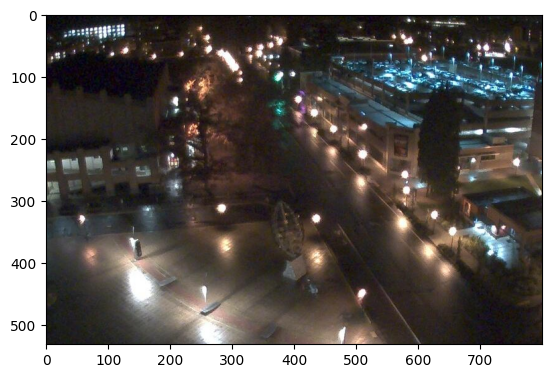

In [74]:
random_img_viz(train_img)

**Penjelasan kode**

Kode tersebut memanggil fungsi random_img_viz(train_img) untuk menampilkan gambar secara acak dari daftar train_img.

## Langkah 3 - Pra Pengolahan Data

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [75]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

**Penjelasan kode**

Kode tersebut mendefinisikan fungsi standarized_input yang digunakan untuk mengubah ukuran gambar menjadi dimensi standar.

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [76]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

**Penjelasan kode**

Kode tersebut mendefinisikan fungsi label_encoder yang digunakan untuk mengubah label kategorikal (siang dan malam) menjadi format numerik.

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [77]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

**Penjelasan kode**

Kode tersebut mendefinisikan fungsi preprocess yang digunakan untuk memproses daftar gambar dan label menjadi format yang standar

Lakukan pra pengolahan data pada data training.

In [78]:
train_std_img_list = preprocess(train_img)

**Penjelasan kode**

Kode tersebut memanggil fungsi preprocess dengan parameter train_img, yang merupakan daftar gambar dan label dari dataset pelatihan.

Lakukan pengecekan ukuran gambar secara acak

In [79]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 121
(600, 1100, 3)


**Penjelasan kode**

1. Mengambil Indeks Acak: pick_random = np.random.randint(0, len(train_std_img_list)) mengambil sebuah indeks acak dari daftar train_std_img_list, yang berisi gambar dan label yang telah diproses.
2. Menampilkan Indeks dan Ukuran Gambar:
* print(f'Image {pick_random}') mencetak indeks gambar yang dipilih secara acak.
* print(train_std_img_list[pick_random][0].shape) mencetak ukuran (shape) dari gambar yang dipilih, memberikan informasi tentang dimensi gambar tersebut.

**WARNING!** Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 1


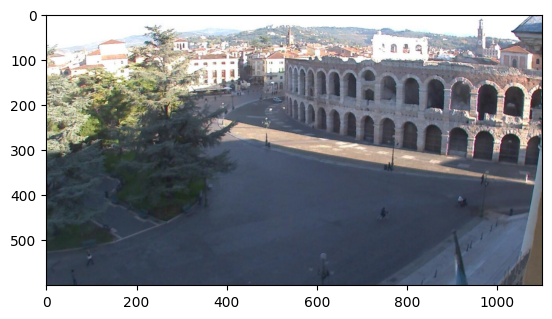

In [80]:
random_img_viz(train_std_img_list)

**Penjelasan kode**

Kode random_img_viz(train_std_img_list) memanggil fungsi random_img_viz dengan parameter train_std_img_list, yang merupakan daftar gambar yang telah distandarisasi dan labelnya.

## Langkah 4 - Ekstraksi Fitur

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [81]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

**Penjelasan kode**

Fungsi avg_brightness(image) bertujuan untuk menghitung rata-rata kecerahan dari sebuah gambar dengan menggunakan ruang warna HSV (Hue, Saturation, Value).

Lakukan pengecekan pada gambar secara acak. **INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!**

Image 70
Avg Brighness: 158.7342


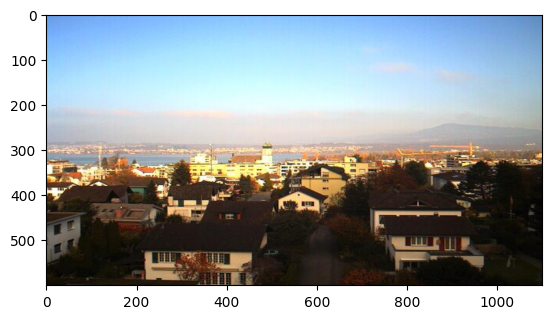

In [82]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Penjelasan kode**

1. Pengacakan Gambar: Menghasilkan indeks acak (rand_img) untuk memilih salah satu gambar dari daftar gambar yang telah diproses (train_std_img_list).
2. Mengambil Gambar: Mengambil gambar yang sesuai dengan indeks acak tersebut (feature_img).
3. Menghitung Rata-rata Kecerahan: Memanggil fungsi avg_brightness() dengan gambar yang dipilih untuk menghitung rata-rata kecerahan gambar.
4. Output Hasil: Mencetak informasi tentang gambar yang dipilih, termasuk indeksnya dan nilai rata-rata kecerahan yang dihitung. Format angka kecerahan dibatasi hingga empat desimal.
5. Visualisasi Gambar: Menampilkan gambar menggunakan plt.imshow(), sehingga pengguna dapat melihat gambar yang sama sambil mempertimbangkan nilai kecerahan yang diperoleh.

## Langkah 5 - Klasifikasi dengan Metode Threshold

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [83]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

**Penjelasan kode**

1. Menghitung Kecerahan Rata-rata: Memanggil fungsi avg_brightness() untuk menghitung rata-rata kecerahan dari gambar yang diberikan (img).
2. Inisialisasi Prediksi: Mengatur nilai awal prediksi (pred) menjadi 0.
3. Prediksi Label: Membandingkan nilai rata-rata kecerahan yang dihitung dengan ambang batas yang ditentukan (threshold).
* Jika kecerahan rata-rata lebih besar dari ambang batas, maka pred diubah menjadi 1, menunjukkan bahwa gambar tersebut diklasifikasikan sebagai "siang".
* Jika tidak, pred tetap 0, menunjukkan "malam".
4. Mengembalikan Prediksi: Fungsi mengembalikan nilai prediksi (pred), yang dapat berupa 0 atau 1, berdasarkan kecerahan rata-rata gambar.

Lakukan pengecekan prediksi secara acak pada data training

Image 112
Actual label: 1
Predicted label: 1


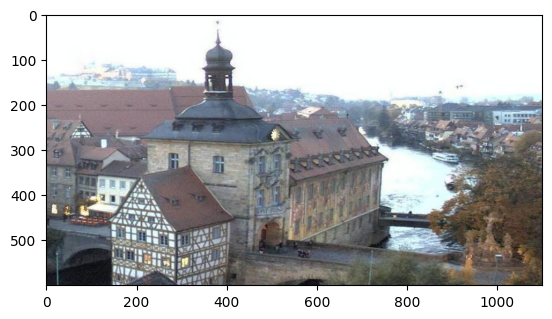

In [84]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Penjelasan kode**

Pemilihan Gambar Acak: Menghasilkan indeks acak (rand_img) untuk memilih gambar dari daftar train_std_img_list.

Prediksi Label: Menggunakan fungsi predict_label() untuk memprediksi label gambar yang dipilih, dengan menggunakan ambang batas (threshold) yang ditetapkan sebagai 120.

Evaluasi Hasil: Mencetak informasi berikut:

Indeks gambar yang diuji (Image {rand_img}).
Label sebenarnya dari gambar tersebut (Actual label).
Label yang diprediksi oleh model (Predicted label).
Visualisasi Gambar: Menampilkan gambar yang diuji menggunakan plt.imshow().

## Langkah 6 - Evaluasi (Manual)

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [85]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

**Penjelasan kode**

Fungsi ini memberikan gambaran umum tentang seberapa baik model dalam mengklasifikasikan gambar berdasarkan kriteria yang telah ditetapkan.








Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [86]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [87]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Penjelasan kode**

Kode ini digunakan untuk mengevaluasi kinerja model klasifikasi pada data pengujian.

## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

## Langkah 4 alternatif - Membuat Feature Vectors

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [88]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

**Penjelasan kode**

Kode ini mendefinisikan fungsi extract_avg_bright_feature() yang digunakan untuk mengekstrak fitur rata-rata kecerahan dari setiap gambar dalam daftar img_list dan menyimpannya dalam format tabular menggunakan DataFrame Pandas.

Cek hasilnya pada data training,

In [89]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,110.299155,1.0
1,110.252348,1.0
2,189.626658,1.0
3,105.600792,1.0
4,109.039258,1.0


**Penjelasan kode**

Kode ini melakukan ekstraksi fitur rata-rata kecerahan dari gambar-gambar dalam daftar train_std_img_list dan menyimpannya dalam DataFrame.

Lakukan langkah yang serupa pada data testing

In [90]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,161.989627,1.0
1,188.119652,1.0
2,183.717738,1.0
3,184.670024,1.0
4,191.237441,1.0


## Langkah 5 alternatif

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [91]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Penjelasan kode**

kode ini menyiapkan data untuk pelatihan dan melatih model SVM untuk klasifikasi berdasarkan rata-rata kecerahan gambar.

## Langkah 6 alternatif

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [92]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


**Penjelasan kode**

kode ini mengevaluasi kinerja model SVM dengan mengukur seberapa akurat model memprediksi label untuk data latih dan data uji.








# Tugas 1 (Opsional)

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
 1. Menggunakan data spam.csv
 2. Fitur CountVectorizer dengan mengaktifkan stop_words
 3. Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
 1. Menggunakan data spam.csv
 2. Fitur TF-IDF dengan mengaktifkan stop_words
 3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
 4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

1. Klasifikasi Suara dengan SVM

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data suara
voice_data = pd.read_csv('/content/voice.csv')

# Misalkan kolom terakhir adalah label dan yang lainnya adalah fitur
X_voice = voice_data.iloc[:, :-1]
y_voice = voice_data.iloc[:, -1]

# Split data menjadi train dan test
X_train_voice, X_test_voice, y_train_voice, y_test_voice = train_test_split(X_voice, y_voice, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm_model = SVC()

# Fit model
svm_model.fit(X_train_voice, y_train_voice)

# Prediksi
y_train_pred_voice = svm_model.predict(X_train_voice)
y_test_pred_voice = svm_model.predict(X_test_voice)

# Evaluasi akurasi
acc_train_voice = accuracy_score(y_train_voice, y_train_pred_voice)
acc_test_voice = accuracy_score(y_test_voice, y_test_pred_voice)

print(f'Accuracy on train data (SVM): {acc_train_voice}')
print(f'Accuracy on test data (SVM): {acc_test_voice}')

Accuracy on train data (SVM): 0.6819258089976322
Accuracy on test data (SVM): 0.6561514195583596


2. Klasifikasi Spam dengan Multinomial Naive Bayes (CountVectorizer)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load data spam
spam_data = pd.read_csv('/content/spam.csv', encoding='latin-1')
spam_data = spam_data[['v1', 'v2']]  # Pastikan hanya mengambil kolom yang relevan
spam_data.columns = ['Labels', 'SMS']  # Rename kolom

# Encode label
spam_data['Labels'] = spam_data['Labels'].map({'spam': 1, 'ham': 0})

# Split data menjadi train dan test
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(spam_data['SMS'], spam_data['Labels'], test_size=0.2, random_state=42)

# Inisialisasi CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
X_train_counts = count_vectorizer.fit_transform(X_train_spam)
X_test_counts = count_vectorizer.transform(X_test_spam)

# Inisialisasi model Naive Bayes
nb_model_count = MultinomialNB()

# Fit model
nb_model_count.fit(X_train_counts, y_train_spam)

# Prediksi
y_train_pred_spam_count = nb_model_count.predict(X_train_counts)
y_test_pred_spam_count = nb_model_count.predict(X_test_counts)

# Evaluasi akurasi
acc_train_spam_count = accuracy_score(y_train_spam, y_train_pred_spam_count)
acc_test_spam_count = accuracy_score(y_test_spam, y_test_pred_spam_count)

print(f'Accuracy on train data (Multinomial NB - CountVectorizer): {acc_train_spam_count}')
print(f'Accuracy on test data (Multinomial NB - CountVectorizer): {acc_test_spam_count}')


Accuracy on train data (Multinomial NB - CountVectorizer): 0.9946152120260264
Accuracy on test data (Multinomial NB - CountVectorizer): 0.9838565022421525


3. Klasifikasi Spam dengan Multinomial Naive Bayes (TF-IDF)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_spam)
X_test_tfidf = tfidf_vectorizer.transform(X_test_spam)

# Inisialisasi model Naive Bayes
nb_model_tfidf = MultinomialNB()

# Fit model
nb_model_tfidf.fit(X_train_tfidf, y_train_spam)

# Prediksi
y_train_pred_spam_tfidf = nb_model_tfidf.predict(X_train_tfidf)
y_test_pred_spam_tfidf = nb_model_tfidf.predict(X_test_tfidf)

# Evaluasi akurasi
acc_train_spam_tfidf = accuracy_score(y_train_spam, y_train_pred_spam_tfidf)
acc_test_spam_tfidf = accuracy_score(y_test_spam, y_test_pred_spam_tfidf)

print(f'Accuracy on train data (Multinomial NB - TF-IDF): {acc_train_spam_tfidf}')
print(f'Accuracy on test data (Multinomial NB - TF-IDF): {acc_test_spam_tfidf}')

Accuracy on train data (Multinomial NB - TF-IDF): 0.9838456360780794
Accuracy on test data (Multinomial NB - TF-IDF): 0.9668161434977578


# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [102]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Penjelasan kode**

* os: Digunakan untuk berinteraksi dengan sistem file dan direktori.
* cv2: Library OpenCV untuk memproses citra dan video.
* numpy: Digunakan untuk operasi numerik dan manipulasi array.
* svm dari sklearn: Mengimpor Support Vector Machine (SVM) untuk klasifikasi.
* train_test_split dari sklearn.model_selection: Untuk membagi dataset menjadi data pelatihan dan pengujian.
* classification_report dan accuracy_score dari sklearn.metrics: Digunakan untuk mengevaluasi performa model klasifikasi.

In [106]:
# Fungsi untuk mengekstrak histogram warna dari sebuah gambar
def extract_histogram(image_path, bins=(8, 8, 8)):
    # Membaca gambar dari path yang diberikan
    image = cv2.imread(image_path)
    # Mengubah gambar dari format BGR (OpenCV default) ke RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Menghitung histogram warna untuk ketiga channel RGB
    # bins menentukan berapa banyak kotak interval untuk setiap warna (misalnya 8 interval untuk tiap channel)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    # Normalisasi histogram untuk membuat distribusi lebih seragam
    cv2.normalize(hist, hist)
    # Flatten (ubah menjadi 1 dimensi) histogram untuk dijadikan fitur
    return hist.flatten()

**Penjelasan kode**

1. Fungsi extract_histogram: Mendefinisikan sebuah fungsi untuk mengekstrak histogram warna dari gambar yang diberikan.
2. Membaca Gambar: Menggunakan cv2.imread untuk membaca gambar dari path yang diberikan.
3. Mengubah Warna: Mengubah format gambar dari BGR (format default OpenCV) ke RGB menggunakan cv2.cvtColor.
4. Menghitung Histogram: Menggunakan cv2.calcHist untuk menghitung histogram warna berdasarkan tiga channel RGB. Parameter bins menentukan jumlah interval untuk setiap channel warna.
5. Normalisasi: Menggunakan cv2.normalize untuk menormalkan histogram, membuat distribusi warna lebih seragam, sehingga lebih mudah untuk dibandingkan antar gambar.
6. Flatten: Mengubah histogram yang multidimensi menjadi satu dimensi dengan flatten, sehingga dapat digunakan sebagai fitur untuk model klasifikasi.

In [104]:
# Fungsi untuk memuat gambar dan mengekstrak fitur histogram serta labelnya
def load_data(image_dir):
    features = []
    labels = []
    # Melakukan iterasi untuk setiap subdirektori (kelas) di dalam direktori gambar
    for label in os.listdir(image_dir):
        label_path = os.path.join(image_dir, label)
        # Memastikan bahwa label_path adalah sebuah folder (subdirektori)
        if os.path.isdir(label_path):
            # Melakukan iterasi untuk setiap file gambar dalam subdirektori
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                # Mengecek apakah file berformat gambar (png, jpg, jpeg)
                if img_file.endswith(('.png', '.jpg', '.jpeg')):
                    # Ekstrak histogram dari gambar
                    hist = extract_histogram(img_path)
                    # Menambahkan histogram sebagai fitur
                    features.append(hist)
                    # Menambahkan nama subdirektori sebagai label (kelas) gambar
                    labels.append(label)
    # Mengembalikan fitur dan label dalam bentuk numpy array
    return np.array(features), np.array(labels)

**Penjelasan kode**

1. Fungsi load_data: Mendefinisikan fungsi untuk memuat gambar dari direktori tertentu dan mengekstrak fitur histogram warna beserta labelnya.
2. Inisialisasi: Membuat dua list, features untuk menyimpan histogram gambar dan labels untuk menyimpan label kelas gambar.
3. Iterasi Subdirektori: Melakukan iterasi untuk setiap subdirektori di dalam image_dir, di mana setiap subdirektori mewakili kelas gambar.
4. Memeriksa Folder: Memastikan bahwa label_path adalah sebuah folder.
5. Iterasi File Gambar: Melakukan iterasi untuk setiap file gambar dalam subdirektori tersebut.
6. Pengecekan Format: Mengecek apakah file tersebut berformat gambar (png, jpg, jpeg).
7. Ekstraksi Histogram: Menggunakan fungsi extract_histogram untuk mengekstrak histogram dari gambar yang dibaca.
8. Menyimpan Fitur dan Label: Menambahkan histogram ke dalam features dan nama subdirektori ke dalam labels.
9. Mengembalikan Hasil: Mengembalikan fitur dan label dalam bentuk numpy array, sehingga dapat digunakan untuk pelatihan model klasifikasi.

In [105]:
# Memuat data latih dari direktori training
train_features, train_labels = load_data(train_dir)

**Penjelasan kode**

kode ini mengorganisir dan mempersiapkan data latih untuk digunakan dalam pelatihan model klasifikasi.

In [107]:
# Melatih model SVM dengan kernel linear berdasarkan fitur dan label latih
model = svm.SVC(kernel='linear', probability=True)
model.fit(train_features, train_labels)

SVC(kernel='linear', probability=True)

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

In [108]:
# Memuat data uji dari direktori test
test_features, test_labels = load_data(test_dir)

In [109]:
# Melakukan prediksi pada data uji menggunakan model yang telah dilatih
predictions = model.predict(test_features)

In [110]:
# Menampilkan akurasi dari prediksi model
print("Accuracy:", accuracy_score(test_labels, predictions))

Accuracy: 0.94375


In [111]:
# Menampilkan laporan klasifikasi yang berisi precision, recall, F1-score, dll.
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

         day       1.00      0.89      0.94        80
       night       0.90      1.00      0.95        80

    accuracy                           0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160

